In [20]:
from scipy.optimize import fsolve
import numpy as np
def f(x):
  return np.cos(x)-x
x0=0.05
root=fsolve(f,x0)

In [21]:
#Exercise 2.1
from scipy.optimize import fsolve
import numpy as np
m1=1
m2=4
m3=12
r=0.05
f1=(1+r/m1)**m1
f2=(1+r/m2)**m2
f3=(1+r/m3)**m3
print(f1,f2,f3)
# or
def simple_return(r,m=None):
  if m is None:
    x=np.exp(r)
  else:
    x=((1+(r/m))**m)
  return x

x1= simple_return(0.05,1)
x2= simple_return(0.05,4)
x3= simple_return(0.05,12)
print(x1,x2,x3)

1.05 1.0509453369140622 1.051161897881733
1.05 1.0509453369140622 1.051161897881733


there is a higher return when m=12

In [22]:
#Exercise 2.2 Assume that the price of a bond is B = $950, the face value F = $1, 000, the annual coupon is C = $50 and the maturity is T = 3 years.
import numpy as np
import math
from scipy.optimize import fsolve


B = 950           # Bond price
F = 1000          # Face value
C = 50            # Annual coupon
T = 3             # Maturity (in years)
t = 0             # Valuation time is today

# Function to solve: PV of all payments - actual bond price = 0
def bond_price_equation(y):
    face_value_pv = F * math.e**(-y * (T - t))
    coupons_pv = sum(C * math.e**(-y * (T - ti)) for ti in range(1, T + 1))
    return B-(face_value_pv + coupons_pv)

# Initial guess for y
initial_guess = 0.05  # 5%

# Solve using fsolve
ytm_solution = fsolve(bond_price_equation, initial_guess)[0]

print(f"Numerically solved Yield to Maturity (YTM): {ytm_solution:.5f} or {ytm_solution * 100:.2f}%")


ytm_approx = (C + (F - B) / T) / ((F + B) / 2)

print(f"Numerical YTM:      {ytm_solution:.6f} or {ytm_solution*100:.2f}%")
print(f"Approximate YTM:    {ytm_approx:.6f} or {ytm_approx*100:.2f}%")
print(f"Difference:         {abs(ytm_solution- ytm_approx):.6f}")


Numerically solved Yield to Maturity (YTM): 0.07026 or 7.03%
Numerical YTM:      0.070262 or 7.03%
Approximate YTM:    0.068376 or 6.84%
Difference:         0.001886


In [23]:
#Exercise 2.2 pt 2
C = 50         # Annual coupon
F = 1000       # Face value
B = 950        # Bond price
N = 3          # Years to maturity

ytm_approx = (C + (F - B) / N) / ((F + B) / 2)

print(f"Approximate Yield to Maturity (YTM): {ytm_approx:.5f} or {ytm_approx * 100:.2f}%")


Approximate Yield to Maturity (YTM): 0.06838 or 6.84%


In [24]:
#Exercise 2.3
import numpy as np


B = 1085.9     # Bond price
F = 1000       # Face value
C = 50         # Coupon
r = 0.02       # Discount rate
T = 3          # Years
delta_r = 0.01 # Interest rate increase

# Cash flows
cash_flows = [C, C, C + F]
times = np.array([1, 2, 3])

# Macaulay Duration
discounted_cashflows = [cf * np.exp(-r * t) for cf, t in zip(cash_flows, times)]
duration_numerator = sum(t * cf * np.exp(-r * t) for t, cf in zip(times, cash_flows))
macaulay_duration = duration_numerator / B

# Convexity
convexity_numerator = sum(cf * np.exp(-r * t) * t**2 for t, cf in zip(times, cash_flows))
convexity = convexity_numerator / B

# Price change estimation using duration and convexity
dB_over_B = -macaulay_duration * delta_r + 0.5 * convexity * (delta_r ** 2)
dollar_change = dB_over_B * B
new_price = B + dollar_change

#exact increase
import numpy as np

r_new = 0.03         # New rate (after +1%)
delta_r = 0.01

# Time points and cash flows
times = np.array([1, 2, 3])
cash_flows = np.array([C, C, C + F])


# Approximate dB
dB_over_B = -macaulay_duration * delta_r + 0.5 * convexity * (delta_r ** 2)
approx_change = dB_over_B * B
approx_new_price = B + approx_change

discounted_cashflows_new = cash_flows * np.exp(-r_new * times)
exact_new_price = sum(discounted_cashflows_new)
exact_change = exact_new_price - B

print(f"--- Approximation ---")
print(f"Macaulay Duration: {macaulay_duration:.5f}")
print(f"Convexity: {convexity:.5f}")
print(f"Approximate Change: ${approx_change:.4f}")
print(f"Approximate New Price: ${approx_new_price:.4f}")

print(f"\n--- Exact Calculation ---")
print(f"Exact Change: ${exact_change:.4f}")
print(f"Exact New Price: ${exact_new_price:.4f}")

print(f"\n--- Comparison ---")
print(f"Difference between Approx and Exact: ${abs(approx_new_price - exact_new_price):.4f}")

# Print results
print(f"Macaulay Duration: {macaulay_duration:.5f} years")
print(f"Convexity: {convexity:.5f}")
print(f"Approximate % Price Change: {dB_over_B * 100:.5f}%")
print(f"Approximate $ Price Change: {dollar_change:.4f}")
print(f"New Bond Price Estimate: {new_price:.4f}")

--- Approximation ---
Macaulay Duration: 2.86550
Convexity: 8.41776
Approximate Change: $-30.6594
Approximate New Price: $1055.2406

--- Exact Calculation ---
Exact Change: $-30.6618
Exact New Price: $1055.2382

--- Comparison ---
Difference between Approx and Exact: $0.0023
Macaulay Duration: 2.86550 years
Convexity: 8.41776
Approximate % Price Change: -2.82341%
Approximate $ Price Change: -30.6594
New Bond Price Estimate: 1055.2406


In [25]:
#exercise 3.1-Assume that the price of an underlying asset is S0 = 100, the interest rates are r = 5%,
#the yield of the dividends q = 2% and a maturity of T = 1, which would be the value of the future/forward price?

import numpy as np


S0 = 100
r = 0.05
q = 0.02
T = 1

# Forward price formula
F = S0 * np.exp((r - q) * T)

print(f"Forward Price: ${F:.4f}")


Forward Price: $103.0455


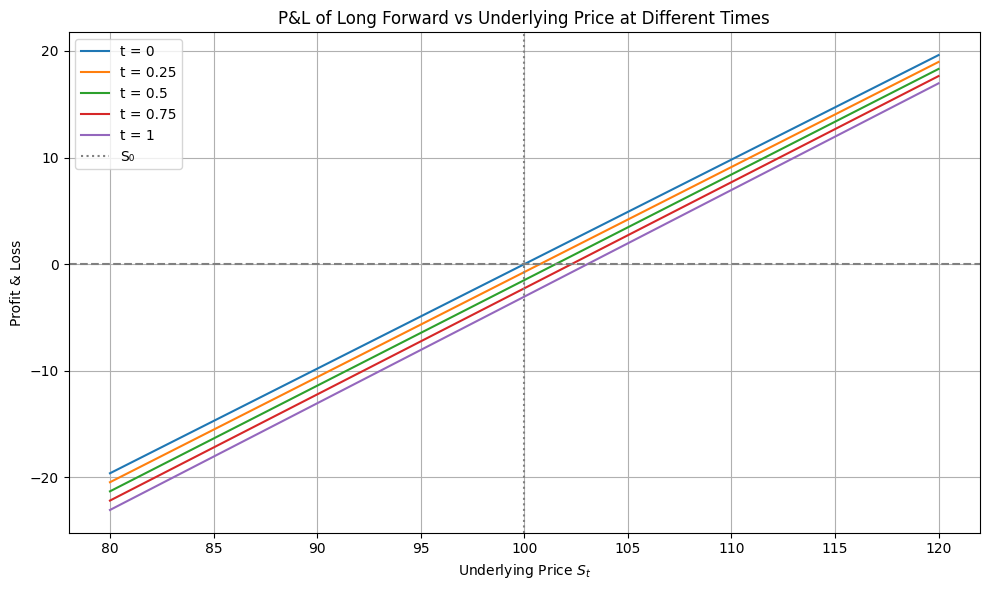

In [26]:
#Exercise 3.2 Plot the profit and loss (P&L) of a long forward as a function of St for the times t={0,0.25,0.5,0.75,1}ifS0 =100,r=5%,q=2%andT =1.
import numpy as np
import matplotlib.pyplot as plt


S0 = 100
r = 0.05
q = 0.02
T = 1
F = S0 * np.exp((r - q) * T)  # Forward price

# Times to evaluate
times = [0, 0.25, 0.5, 0.75, 1]

# Range of underlying prices
S_range = np.linspace(80, 120, 200)

# Plot
plt.figure(figsize=(10, 6))

for t in times:
    if t == T:
        pnl = S_range - F  # At maturity
    else:
        pnl = S_range * np.exp(-q * (T - t)) - F * np.exp(-r * (T - t))
    plt.plot(S_range, pnl, label=f"t = {t}")


plt.axhline(0, color='gray', linestyle='--')
plt.axvline(S0, color='gray', linestyle=':', label='S₀')
plt.title("P&L of Long Forward vs Underlying Price at Different Times")
plt.xlabel("Underlying Price $S_t$")
plt.ylabel("Profit & Loss")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [27]:
#exercize 3.3 Assume a 1-year swap contract with a notional of N = $10M of an equity with current price S0 = $5, 000,
#a dividend yield of q = 1.5%, a risk-free rate of r = 5% and a swap spread of s = 50 bps (0.5%).
#Which would be the present value of both legs? Based on this result, which is the price that would this swap have? Specify who would pay it to whom.
#A way to avoid this payment is allowing the floating leg to set a swap spread that ensures that the swap present value is zero. Which would be this spread value?

import numpy

N = 10_000_000          # Notional
S0 = 5_000              # Current stock price
q = 0.015               # Dividend yield
r = 0.05                # Risk-free rate
s = 0.005               # Swap spread (50 bps = 0.5%)
T = 1                   # Maturity in years

# Expected stock price at time T under risk-neutral measure
ST = S0 * (1 - q) * (1 + r)  # Approximation: growth adjusted for dividend

# Floating leg PV
floating_leg_pv = (ST / (1 + r)) * N / S0

# Fixed leg PV = notional * (1 + fixed rate)^T discounted back
fixed_leg_cash_flow = (1 + r + s) * N
fixed_leg_pv = fixed_leg_cash_flow / (1 + r)

# Swap value
swap_value = floating_leg_pv - fixed_leg_pv

# Now calculate the spread that makes the swap value zero
# s_fair - fair spread: (1 + r + s_fair) * N / (1 + r) = floating_leg_pv
s_fair = (floating_leg_pv * (1 + r) / N) - (1 + r)

print("Floating leg PV: ${:,.2f}".format(floating_leg_pv))
print("Fixed leg PV: ${:,.2f}".format(fixed_leg_pv))
print("Swap Value: ${:,.2f}".format(swap_value))
print("Fair Swap Spread: {:.2f} bps".format(s_fair * 10_000))


Floating leg PV: $9,850,000.00
Fixed leg PV: $10,047,619.05
Swap Value: $-197,619.05
Fair Swap Spread: -157.50 bps


In [28]:
#Exercise 4.1 Assume that the 1-year spot rate is 5% and the 2-year spot rate is 5.5%. Which is the forward rate from year 1 to year 2?

r1 = 0.05    # 1-year spot rate
r2 = 0.055   # 2-year spot rate

# Calculate 1-year forward rate from year 1 to year 2
forward_rate = ((1 + r2)**2 / (1 + r1)) - 1

print("1-year forward rate from year 1 to 2: {:.2f}%".format(forward_rate * 100))


1-year forward rate from year 1 to 2: 6.00%


In [29]:
#Exercise 4.2
import sympy as sp

T = sp.symbols('T', real=True, positive=True)

# Define the bond price function Z(0,T)
Z = sp.exp(-0.03*T - 0.002*T**2)

# a) Compute instantaneous forward rate f(0,T) = -d/dT ln(Z(0,T))
f = -sp.diff(sp.log(Z), T)
f_simplified = sp.simplify(f)

# b) Manually derive f(0,T) from the exponent A(T) = 0.03T + 0.002T^2
A = 0.03*T + 0.002*T**2
f_manual = sp.diff(A, T)

#c) Evaluate f(0,T) at T = 2
f_at_2 = f_simplified.subs(T, 2)

print("a) Instantaneous forward rate f(0,T):", f_simplified)
print("b) Manual derivation from A(T):", f_manual)
print("c) f(0,2) =", float(f_at_2))

a) Instantaneous forward rate f(0,T): 0.004*T + 0.03
b) Manual derivation from A(T): 0.004*T + 0.03
c) f(0,2) = 0.038


In [30]:
#Exercise 4.3 Consider an FRA where we will receive a rate of 6%, and pay LIBOR on a principal of $100 million between
#the end of year 1 and the end of year 2. In this case, the forward rate is a 5.127% and the risk-free interest rate is a 2%. Which is the FRA value?
N = 100000000               # Notional
fixed_rate = 0.06           # FRA fixed rate
forward_rate = 0.05127      # Market-implied forward rate
r = 0.02                    # Risk-free rate
delta = 1                   # Year fraction between T1 and T2

# FRA value
fra_value = (N * (fixed_rate - forward_rate) * delta) / (1 + r * delta)

print(f"FRA Value: ${fra_value:,.2f}")


FRA Value: $855,882.35


In [31]:
#Exercise 4.4
import math

# Zero-coupon continuously compounded rates
r = [0.035, 0.04, 0.045]  # r1, r2, r3
L = [0.037, 0.041, 0.046]  # L1, L2, L3
C = 0.04  # Fixed coupon rate

# Compute discount factors Z=deltat*e^(-rti)
Z = [math.exp(-r[i] * (i + 1)) for i in range(3)]

# a) Present value of floating leg
pv_floating = sum(L[i] * Z[i] for i in range(3))

# b) Present value of fixed leg
pv_fixed = C * sum(Z)

# c) Fair fixed rate that makes swap value zero
C_hat = pv_floating / sum(Z)

print("a) PV of Floating Leg: ${:,.2f}".format(pv_floating))
print("b) PV of Fixed Leg: ${:,.2f}".format(pv_fixed))
print("c) Fair Fixed Rate Ĉ: {:.4%}".format(C_hat))


a) PV of Floating Leg: $0.11
b) PV of Fixed Leg: $0.11
c) Fair Fixed Rate Ĉ: 4.1183%


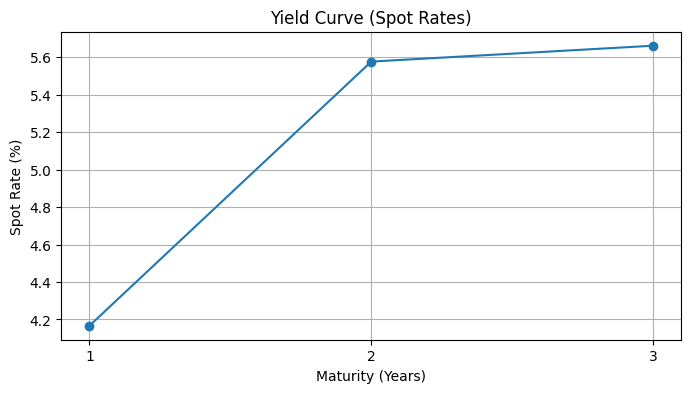

a) 1-Year Spot Rate: 4.1667%
b) 2-Year Spot Rate: 5.5770%
   3-Year Spot Rate: 5.6617%
d) Yield Curve Shape: Normal


In [32]:
#Exercise 4.5
from scipy.optimize import fsolve
import matplotlib.pyplot as plt

# Given prices and cash flows
P1 = 96
P2 = 99
P3 = 101

# Known cash flows
C2 = [5, 105]       # 2-year bond: year 1 and year 2
C3 = [6, 6, 106]    # 3-year bond: year 1, 2, and 3

# a)
r1 = (100 / P1) - 1

# b) Solve for r2 using known r1
def f_r2(r2):
    return C2[0] / (1 + r1) + C2[1] / (1 + r2)**2 - P2

r2_initial_guess = 0.05
r2 = fsolve(f_r2, r2_initial_guess)[0]

# Solve for r3 using known r1 and r2
def f_r3(r3):
    return (
        C3[0] / (1 + r1) +
        C3[1] / (1 + r2)**2 +
        C3[2] / (1 + r3)**3 -
        P3
    )

r3_initial_guess = 0.05
r3 = fsolve(f_r3, r3_initial_guess)[0]

# c)
years = [1, 2, 3]
spot_rates = [r1, r2, r3]

plt.figure(figsize=(8, 4))
plt.plot(years, [r * 100 for r in spot_rates], marker='o')
plt.title("Yield Curve (Spot Rates)")
plt.xlabel("Maturity (Years)")
plt.ylabel("Spot Rate (%)")
plt.grid(True)
plt.xticks(years)
plt.show()

# d)
if spot_rates[2] > spot_rates[1] > spot_rates[0]:
    shape = "Normal"
elif spot_rates[0] > spot_rates[1] > spot_rates[2]:
    shape = "Inverted"
else:
    shape = "Flat or Humped"

print(f"a) 1-Year Spot Rate: {r1:.4%}")
print(f"b) 2-Year Spot Rate: {r2:.4%}")
print(f"   3-Year Spot Rate: {r3:.4%}")
print(f"d) Yield Curve Shape: {shape}")


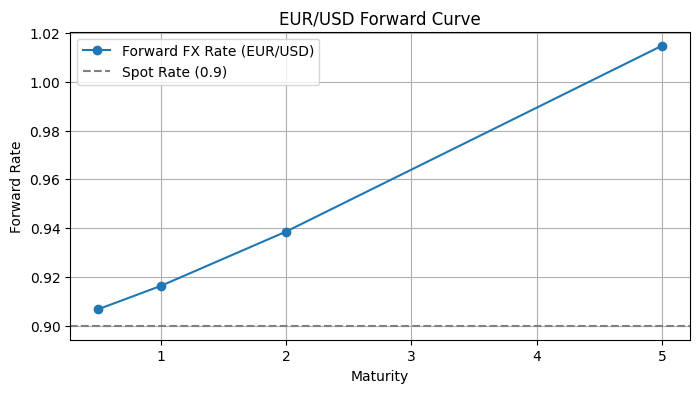

Forward rate= 0.5 years: 0.9068
Forward rate= 1.0 years: 0.9163
Forward rate= 2.0 years: 0.9386
Forward rate= 5.0 years: 1.0147

Forward rate increases with maturity.
Expected devaluation: EUR


In [33]:
#Exercise 5.1
import numpy as np
import matplotlib.pyplot as plt

S0 = 0.9
maturities = np.array([0.5, 1.0, 2.0, 5.0])
usd_rates = np.array([0.025, 0.03, 0.035, 0.04])   # USD rates (domestic)
eur_rates = np.array([0.01, 0.012, 0.014, 0.016])  # EUR rates (foreign)

# Compute forward rates using continuous compounding
forward_rates = S0 * np.exp((usd_rates - eur_rates) * maturities)

# Plotting
plt.figure(figsize=(8, 4))
plt.plot(maturities, forward_rates, marker='o', label="Forward FX Rate (EUR/USD)")
plt.axhline(S0, color='gray', linestyle='--', label="Spot Rate (0.9)")
plt.title("EUR/USD Forward Curve")
plt.xlabel("Maturity")
plt.ylabel("Forward Rate")
plt.grid(True)
plt.legend()
plt.show()

trend = "increases" if forward_rates[-1] > forward_rates[0] else "decreases"
expected_devaluation = "EUR" if forward_rates[-1] > S0 else "USD"

for T, F in zip(maturities, forward_rates):
    print(f"Forward rate= {T} years: {F:.4f}")
print(f"\nForward rate {trend} with maturity.")
print(f"Expected devaluation: {expected_devaluation}")


In [34]:
#Exercise 6.1
import math

S0 = 100
K = 100
u = 1.1
d = 0.9
r = 0.05
T = 2
dt = 1
n = int(T / dt)

# Risk-neutral probability
q = (math.exp(r * dt) - d) / (u - d)

#Generate possible stock prices at maturity
stock_prices = [S0 * (u**j) * (d**(n - j)) for j in range(n + 1)]

#Option payoff at maturity (call)
option_values = [max(S - K, 0) for S in stock_prices]

#Backward induction
for i in range(n - 1, -1, -1):
    option_values = [
        math.exp(-r * dt) * (q * option_values[j + 1] + (1 - q) * option_values[j])
        for j in range(i + 1)
    ]

print(f"Call option value at t=0: ${option_values[0]:.2f}")



Call option value at t=0: $10.87


In [35]:
#Exercise 6.2
import math
from scipy.stats import norm

def black_scholes_cp(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    call_price = S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)
    return call_price


S = 500       # Current stock price
K = 500       # Strike price (ATM)
T = 2         # Time to maturity
r = 0.015     # Risk-free interest rate
sigma = 0.03  # Volatility

call_optionp = black_scholes_cp(S, K, T, r, sigma)
print(f"Call option price: ${call_optionp:.2f}")

Call option price: $17.73


In [36]:
#Exercise 6.3- Which would be the price of a put option today under the Black-Scholes formula if the volatility is a 3%,
#the risk-free interest rate is a 1.5%, the maturity is 2 years and the stock price today is of $500.
import math
from scipy.stats import norm

def black_scholes_pp(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)

    put_price = K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)
    return put_price


S = 500       # Current stock price
K = 500       # Strike price (ATM)
T = 2         # Time to maturity
r = 0.015     # Risk-free interest rate
sigma = 0.03  # Volatility

put_optionp = black_scholes_pp(S, K, T, r, sigma)
print(f"Put option price: ${put_optionp:.2f}")

Put option price: $2.95


In [37]:
#Exercise 6.4
import math
from scipy.stats import norm

def black_scholes_callp(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return S * norm.cdf(d1) - K * math.exp(-r * T) * norm.cdf(d2)

def black_scholes_putp(S, K, T, r, sigma):
    d1 = (math.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * math.sqrt(T))
    d2 = d1 - sigma * math.sqrt(T)
    return K * math.exp(-r * T) * norm.cdf(-d2) - S * norm.cdf(-d1)


S = 500
K = 500
T = 2
r = 0.015
sigma = 0.03

# Prices
call_price = black_scholes_callp(S, K, T, r, sigma)
put_price = black_scholes_putp(S, K, T, r, sigma)

# Left-hand side and right-hand side of the parity equation
lhs = call_price - put_price
rhs = S - K * math.exp(-r * T)

print(f"Call - Put: {lhs:.4f}")
print(f"S - K * exp(-rT): {rhs:.4f}")
print(f"Difference: {abs(lhs - rhs):.8f}")

Call - Put: 14.7772
S - K * exp(-rT): 14.7772
Difference: 0.00000000


For the last exercise, the put-call parity is respected in the Black-Scholes model. THi is valid if the assumptions remain true